In [24]:
import pandas as pd
import numpy as np

#import vaex as vx
import seaborn as sns

import matplotlib.pyplot as plt

import geopandas as gp
import geoplot as gplt

import contextily as cx

In [25]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100

In [42]:
from pathlib import Path

OUTPUT_PATH = Path("./")

FN =  "./datasets_plot/Plants datasets.xlsx"
# ds = pd.read_csv("./plants-dataset-spreadsheet.csv")
# ds = pd.read_csv(FN)
ds = pd.read_excel(FN, sheet_name="Tidy")


In [27]:
###############
## DATASETS PLOT
###############

In [28]:
BIN_COLS = [
    "is_available",
    "is_composed",
    "baseline_available",
    "constantly_updated",
]  # , "is_split"]
NUM_COLS = [
    "num_images",
    "training",
    "validation",
    "test",
    "num_classes",
    "num_images_full",
    "num_classes_full",
    "IMPORTANT",
]

In [29]:
ds[BIN_COLS] = ds[BIN_COLS].astype(bool)
ds[NUM_COLS] = ds[NUM_COLS].astype(int, errors="ignore")
ds["not_train"] = ds["test"] + ds["validation"]
ds["is_split"] = ds["not_train"].astype(bool)
ds

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,...,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,...,user-generated,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,...,user-generated,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,...,user-generated,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,...,NaN,CC-BY-4.0,False,True,NaN,0.0,0.0,NaN,NaN,NaN
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,...,user-generated,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,...,user-generated,custom,False,False,0.0,1.0,2.0,NaN,NaN,8751.0
6,iNat2019,iNat2019,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,NaN,False,NaN,...,user-generated,custom,False,False,0.0,0.0,2.0,REMAINING: look at how many plants there are a...,NaN,NaN
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,...,user-generated,custom,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0
8,plantNaturalist-500k,plantNaturalist-500k,NaN,https://huggingface.co/datasets/anhaltai/plant...,True,field,False,500909.0,True,300545.0,...,user-generated,"CC-0,CC-BY,CC-BY-NC",True,False,0.0,1.0,5.0,our dataset ^^,NaN,200364.0
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,...,user-generated,"CC-0,CC-BY,CC-BY-NC",False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0


In [30]:
MAP_STAND_DICT = {0.0: "Not standardized", 1.0: "Standardized", 2.0: "N/A"}
ds.loc[:, "is_standardized_parsed"] = ds.is_standardized.apply(
    lambda x: MAP_STAND_DICT.get(x, "None")
)
ds

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,...,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,...,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,...,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,...,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,...,CC-BY-4.0,False,True,NaN,0.0,0.0,NaN,NaN,NaN,None
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,...,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,...,custom,False,False,0.0,1.0,2.0,NaN,NaN,8751.0,Not standardized
6,iNat2019,iNat2019,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,NaN,False,NaN,...,custom,False,False,0.0,0.0,2.0,REMAINING: look at how many plants there are a...,NaN,NaN,Not standardized
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,...,custom,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0,Not standardized
8,plantNaturalist-500k,plantNaturalist-500k,NaN,https://huggingface.co/datasets/anhaltai/plant...,True,field,False,500909.0,True,300545.0,...,"CC-0,CC-BY,CC-BY-NC",True,False,0.0,1.0,5.0,our dataset ^^,NaN,200364.0,Not standardized
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,...,"CC-0,CC-BY,CC-BY-NC",False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0,Not standardized


In [31]:
def num_splits(row):
    num_splits = 1
    if row.test and row.test > 0:
        num_splits += 1
    if row.validation and row.validation > 0:
        num_splits += 1
    if row["name"] == "Flora Incognita":
        num_splits = 0
    return num_splits


ds["num_splits"] = ds.apply(num_splits, axis=1)
ds.head()

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,...,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed,num_splits
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,...,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized,3
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,...,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized,1
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,...,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized,1
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,...,False,True,NaN,0.0,0.0,NaN,NaN,NaN,None,1
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized,2


In [32]:
dsp = ds.dropna(subset=["num_images", "num_classes"], inplace=False)
dsp

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,...,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed,num_splits
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,...,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized,3
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,...,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized,1
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,...,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized,1
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized,2
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,...,False,False,0.0,1.0,2.0,NaN,NaN,8751.0,Not standardized,2
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,...,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0,Not standardized,2
8,plantNaturalist-500k,plantNaturalist-500k,NaN,https://huggingface.co/datasets/anhaltai/plant...,True,field,False,500909.0,True,300545.0,...,True,False,0.0,1.0,5.0,our dataset ^^,NaN,200364.0,Not standardized,3
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,...,False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0,Not standardized,1
10,iNaturalist,iNaturalist,NaN,https://www.inaturalist.org/taxa/47126-Plantae...,True,field,False,57480960.0,True,57480960.0,...,False,True,0.0,1.0,1.0,all of iNaturalist,NaN,0.0,Not standardized,1
11,Plant Seedlings Dataset,Plant Seedlings Dataset,https://doi.org/10.48550/arXiv.1711.05458,https://vision.eng.au.dk/plant-seedlings-dataset/,True,lab,False,4750.0,True,4750.0,...,False,False,1.0,1.0,1.0,"~960 plants, 4750 indiv. pictures in diff grow...",NaN,0.0,Standardized,1


In [33]:
len(ds[ds.DONE == 1])

22

In [34]:
import matplotlib.pyplot as plt
import adjustText
from matplotlib.markers import MarkerStyle

sns.set_style("white")

Text(0.5, 1.0, 'Some datasets, in red: not easily downloadable')

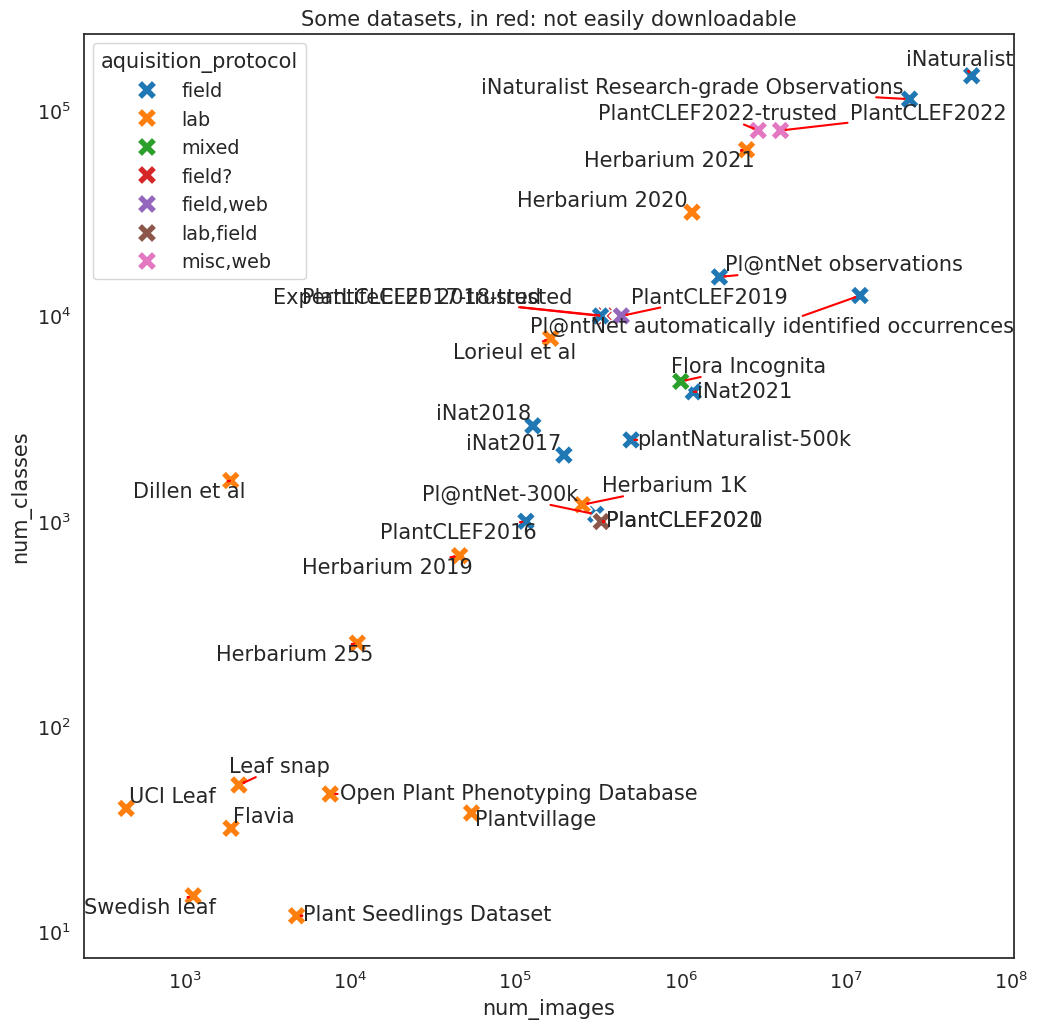

In [35]:
sns.set_context("notebook", font_scale=1.25)
ax = sns.scatterplot(
    data=dsp,
    x="num_images",
    y="num_classes",
    # style="is_available",
    # hue="type",
    hue="aquisition_protocol",
    s=200,
    # marker="$x$",
    marker="X",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(12, 12)

texts = list()
for i, row in dsp.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes,
        row["name"],
        ha="center",
        va="center",
        # color="black" if row["is_available"] else "red",
    )
    texts.append(txt)

adjustText.adjust_text(
    texts,
    arrowprops=dict(
        arrowstyle="->",
        # arrowstyle="-|>",
        color="red",
        lw=1.5,
    ),
)

ax.set_title("Some datasets, in red: not easily downloadable")

In [36]:
from matplotlib.markers import MarkerStyle

In [37]:
# Delete the not-trusted 2022 dataset
dsp.drop(index=20, inplace=True)

/tmp/ipykernel_157636/2556983625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsp.drop(index=20, inplace=True)


In [38]:
# Flora Incognita
dsp.loc[13, "num_splits"] = "N/A"

/tmp/ipykernel_157636/3609471819.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dsp.loc[13, "num_splits"] = "N/A"


In [40]:
cc = sns.color_palette("tab10")
sns.color_palette([cc[1],cc[0],cc[2]])


[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

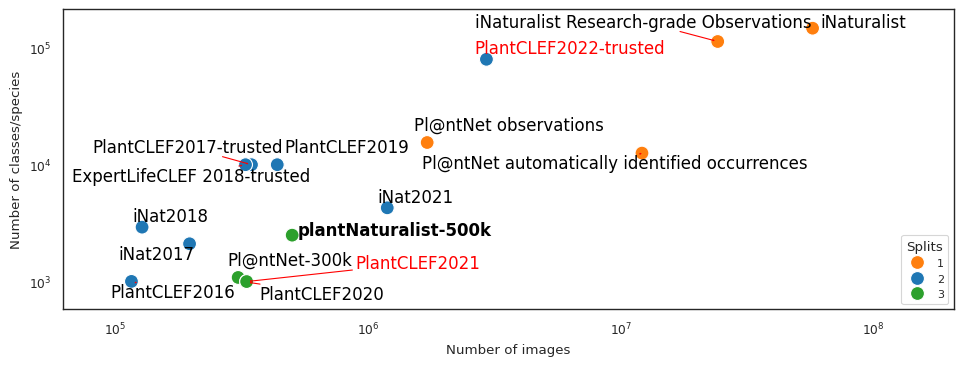

In [43]:
sns.set_context("paper")
data = dsp[dsp.num_images > 80_000]
data = data[data["type"] != "herbarium"]
data = data[data["name"] != "Flora Incognita"]

# orange blue green colors-
cc = sns.color_palette("tab10")
cp = sns.color_palette([cc[1],cc[0],cc[2]])



ax = sns.scatterplot(
    data=data,
    x="num_images",
    y="num_classes",
    # style="is_standardized_parsed",
    hue="num_splits",
    # hue="type",
    # hue="aquisition_protocol",
    s=100,
    
    #palette="rocket_r",
    #palette=sns.diverging_palette(250, 30, 3, l=65, center="dark"),
    #palette=sns.color_palette("tab10", 3),
    palette=cp,

    
    # palette="bright",
    # palette=sns.color_palette("rainbow",3),
    
    #style="is_available",
    #markers={
    #    False: MarkerStyle("X"),
    #    True: MarkerStyle("o"),
    #},
    # marker="X",
    # marker="X"
    # marker="$x$",
    # marker=MarkerStyle("*"),
    # marker=MarkerStyle("x"),
    # style="is_available",
    # markers={True: MarkerStyle("x"), False: MarkerStyle("+")},
    # legend="full",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(11.5, 3.9)

ax.set_ylabel("Number of classes/species")
ax.set_xlabel("Number of images")

texts = list()
for i, row in data.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes - (10 if row["name"] == "PlantCLEF2020" else 0),
        # row["name"].upper(),
        row["name"],
        # row["short"],
        ha="center",
        va="center",
        # va="bottom" if row["is_available"] else "center",
        # ha="center" if row["is_available"] else "right",
        color="black" if row["is_available"] else "red",
        fontsize=12,
        fontweight="normal" if row["name"] != "plantNaturalist-500k" else "bold",
    )
    texts.append(txt)

# Increase lims so there's place for text
left, right = ax.get_xlim()
ax.set_xlim(left - 15000, right + 100000000)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - 200, top + 10000)


adjustText.adjust_text(
    texts,
    # expand=(1.5, 2.0),
    # expand=(1, 1.4),
    # force_explode=(0.01, 0.03),
    avoid_self=True,
    #force_text=(0.1, 0.3),
    #force_static=(0.1, 0.3),
    min_arrow_len=10,
    time_lim=8.0,
    arrowprops=dict(
        # arrowstyle="->",
        arrowstyle="-|>",
        color="red",
        # lw=1.5,
    ),
)

# Increase lims AGAIN, now that the text is set, to create pretty white margins around them
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top + 16000)
left, right = ax.get_xlim()
ax.set_xlim(left - 8000, right + 30140000)

# ax.set_title("Some datasets, in red: not publicly available")
# sns.move_legend(ax, "lower right")
ax.legend(fontsize=8, markerscale=1, loc="lower right", title="Splits", alignment="left")

# order = [1, 2, 0, 3]
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend([handles[i] for i in order], [labels[i] for i in order])

ax.figure.savefig("dataset_sizes_plot_v2.png", bbox_inches="tight")

ax.figure.savefig(OUTPUT_PATH / "datasets_plot" / "dataset_sizes_plot_new2.png", bbox_inches="tight")

ax.figure.savefig(OUTPUT_PATH / "datasets_plot" / "dataset_sizes_plot_new2.pdf", bbox_inches="tight")